    Department Of Computer Science
    COMP4381, SP.TOP: DATA SCIENCE AND ANALYTICS
    Dr. Hussein Soboh
    COMP4381 | Section 1 


## <div align=center> Assignment #5 </div>
<div align=center><b>Analyis of a UK-based online retail transactions </b></div>
<div align=center>Occurring between 01/12/2009 and 09/12/2011</div>

<a href="https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci">https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci</a>

    Prepeared by: Sondos Aabed   
    ID: 1190652
<a id='intro'></a>
<hr>

**Dear Online Retail company representative,**

The follwing report is written to inform you about the analysis results condocted on the data collected between 01/12/2009 and 09/12/2011 from your UK-based online retail transactions. 

In this analysis report, several key aspects based on your requirements provided earlier are addressed:

1. **Top 5 invoices based on their Total sales**
2. **Top 5 customers based on their Total buying**
3. **Top 5 Selling Items during that Period**
4. **Top 20 Pairs, Most Frequently Purchased Item Pairs by Customers**
5. **Recommendations for a New Promotion Targeting Items with Low Sales Volume**

Please note that this report follows the follwing structure, and you are able to get back up within the notebook.

- Your question and its corresponding number.
- Code cell(s) implementing the necessary calculations and data manipulations. (as a non-technincal reveiwer you can look at the results and the onterpretation)
- Markdown cell presenting the results obtained and providing interpretation.
- You can also check the table of contents, list of figures, and list of tables.

For your information, a random sample of 200k rows from the dataset using (1190652) as the seed to ensure reproducibility.

Insights of this analysis will help in strategic decisions for optimizing sales and customer satisfaction.

Should you have any further queries or require additional clarifications, please do not hesitate to reach out.

Best regards,

<i>Sondos Aabed,</i>

<hr>

#### <b>Table of Contents</b>
- <b>Introduction</b>
- <b>Objectives</b>
- <b>Software Listings</b>
- <b>Dataset Analysis</b>
    - Load and Sample Data
    - Dataset Initial Exploration
    - Date and total price handling
    - Visualization
    - Queries
- <b>Conclusion</b>
- <b>Refrences</b>

#### <b>List of Figures</b>
- Figure 1: Total Sales and Canceled Invoices
- Figure 2: Number of Invoices Over Months
- Figure 3: Word Cloud of Product Descriptions

#### <b>List of Tables</b>
- Table 0: Attributes Information
- Table 1: Software Litening
- Table 2: Standard Error of Means for numerical columns
- Table 3: Dataset Head
- Table 4: Dataset Tail
- Table 5: Dataset Numerical Describtion
- Table 6: Missing Values By Percentage 
- Table 7: Dataset Columns Data types
- Table 8: Number of uniques in the datasets
- Table 9: Top 5 invoices
- Table 10: Top 5 customers
<hr>

#### <b>Introduction</b>

Understanding customer behavior and transactional patterns in this evolving era of online retail, is essential for driving strategic decision-making and optimizing sales strategies. This analysis notebook to explore UK-based online retail transactions from December 1st, 2009, to December 9th, 2011. The dataset has all-occasion gift-ware sales, providing consumer preferences, purchasing habits, and market trends within the specified timeframe.

<b>Table 0:</b> Attribute Information: [3]

|Attribute |Data Type| Describtion |
|-----|------|------|
|InvoiceNo|Nominal|A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.|
|StockCode|Nominal|A 5-digit integral number uniquely assigned to each distinct product|
|Description|Nominal|Product (item) name|
|Quantity|Numeric|The quantities of each product (item) per transaction|
|InvoiceDate|Numeric|The day and time when a transaction was generated|
|UnitPrice|Numeric|Product price per unit in sterling (Â£)|
|CustomerID|Nominal|A 5-digit integral number uniquely assigned to each customer|
|Country|Nominal|The name of the country where a customer resides|

<hr>

#### <b>Objectives</b>
[Back](#intro)

- Randomly sample 200k rows from the dataset.
- Explore the dataset.
- Get insights from queries:
    - Get total sales per invoice and identify the top 5 invoices.
    - Compute total sales per customer and list the top 5 customers.
    - Identify the top 5 selling items during the specified period.
    - Determine the most frequently purchased item pairs by customers and display the top 20 pairs.
    - Recommend 10 pairs of items for a new promotion targeting items with low sales volume.
    
<hr>

#### <b>Software Listing</b>
[Back](#intro)

The followning table shows the software tools and versions used in this experimnet.

Table 1: Software Listenings

|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Visual Studio Code |Updated|
|Git & github|[Repo.](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/blob/main/Assignments/A4/1190652_A4.ipynb)|

<hr>

#### <b>Dataset Analysis</b>
[Back](#intro)

- Neccessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from wordcloud import WordCloud

><b>Loading Data and Sampling</b>

- Read a 200k sample with 1190652 random seed, and calculate sample error

In [2]:
def read_sample(sample_size = 200000, path='./online_retail_II.csv', seed = 1190652):
    """
    Read a csv file into dataframe and take a sample
    Args:
        path (str): the path of the dataset takes a deafult value (relative path)
        seed (int): the seed for randomness so each time it have the same random selcetd
    Returns:
        sample (pd.Dataframe): sample taken from the read df with specific seed
    """
    df = pd.read_csv(path)
    sample = df.sample(sample_size, random_state=seed)
    return df, sample

In [3]:
df, sample = read_sample()
sem = pd.DataFrame(sample.sem(numeric_only= True), columns=['SEM'])
print("Table 2: Standard Error of Means for numerical columns:")
display(sem)

Table 2: Standard Error of Means for numerical columns:


,SEM
Quantity,0.413771
Price,0.287015
Customer ID,4.313394


***Interpretaion***

A sample of 200k is taken from 1,067,371 population. To quantize how accurate the sample represnts the population the standard error of means measurment is taken. For the Quantity Column the SEM is 0.413771 and it is relativly low and it is accepted. As for the Price coulmn it has 0.287015 SEM and it is relativly low and accepted. Finalyy the Customer ID column (the customer ID has unique values) this is the highest SEM it's value is 4.313394 this might affect the for example (loyalty analysis) and personalized marketing. 

> This might not be the best way to get Top 5 cutomers and Top 5 items, hence some queries will be called on the whole population.


> <b>Dataset Exploration</b>

- Get the missing Values percentages

In [4]:
def missing_values(df):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': missing_count.values / len(df) * 100  
    })
    return  missing_percetanges

- Explore the data including: head, tail, number of uniques, number of NA, statistical describtion for numerical, and data types

In [5]:
def explore_sample(sample):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    head = pd.DataFrame(sample.head())
    tail = pd.DataFrame(sample.tail())
    nunique = pd.DataFrame(sample.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(sample.describe())
    dtypes =  pd.DataFrame(sample.dtypes, columns=["Datatype"])
    results = {
        'Table 3: Dataset Head:':head,
        'Table 4: Dataset Tail:':tail,
        'Table 5: Dataset Numerical Describtion: ':describe,
        'Table 6: Missing Values By Percentage': missing_values(sample), 
        'Table 7: Dataset Columns Data types: ':dtypes,
        'Table 8: Number of uniques in the datasets:':nunique}
    return results

- Print the dataframes of exploration results.

In [6]:
def print_sample_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Table 6: Missing Values By Percentage':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [7]:
results = explore_sample(sample)
print_sample_exploration(results)

Table 3: Dataset Head:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
803443,561203,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,12,2011-07-25 15:17:00,1.25,14232.0,United Kingdom
607418,543182,22726,ALARM CLOCK BAKELIKE GREEN,3,2011-02-04 10:40:00,7.46,NaN,United Kingdom
117428,500567,47586A,PINK FAIRY CAKE CUSHION COVER,24,2010-03-08 15:49:00,0.85,13694.0,United Kingdom
299616,518570,35961,FOLKART ZINC HEART CHRISTMAS DEC,1,2010-08-10 11:49:00,1.66,NaN,United Kingdom
613909,543803,22525,CHILDRENS GARDEN GLOVES PINK,5,2011-02-13 12:05:00,1.25,17126.0,United Kingdom


Table 4: Dataset Tail:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
107865,499765,21916,SET 12 RETRO WHITE CHALK STICKS,1,2010-03-02 13:15:00,0.81,NaN,United Kingdom
1000423,576857,23102,SILVER HEARTS TABLE DECORATION,2,2011-11-16 15:52:00,0.83,12748.0,United Kingdom
827091,563350,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2011-08-15 14:10:00,4.95,14498.0,United Kingdom
553404,538576,21187,WHITE BELL HONEYCOMB PAPER GARLAND,2,2010-12-13 11:29:00,1.65,14498.0,United Kingdom
47491,493817,21306,SET/4 DAISY MIRROR MAGNETS,6,2010-01-07 12:22:00,2.10,16641.0,United Kingdom


Table 5: Dataset Numerical Describtion: 


,Quantity,Price,Customer ID
count,200000.000000,200000.000000,154545.000000
mean,9.487405,4.505168,15324.988269
std,185.044141,128.357150,1695.690684
min,-74215.000000,-44031.790000,12346.000000
25%,1.000000,1.250000,13975.000000
50%,3.000000,2.100000,15251.000000
75%,10.000000,4.130000,16797.000000
max,12960.000000,18910.690000,18287.000000


Table 6: Missing Values By Percentage
Total Sum of Missing Percetange:  23.136499999999998


,Column,Counts,Percentage
0,Invoice,0,0.0000
1,StockCode,0,0.0000
2,Description,818,0.4090
3,Quantity,0,0.0000
4,InvoiceDate,0,0.0000
5,Price,0,0.0000
6,Customer ID,45455,22.7275
7,Country,0,0.0000


Table 7: Dataset Columns Data types: 


,Datatype
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
Price,float64
Customer ID,float64
Country,object


Table 8: Number of uniques in the datasets:


,#_of_Unique
Invoice,36313
StockCode,4698
Description,5043
Quantity,533
InvoiceDate,33985
Price,1009
Customer ID,5575
Country,43


***Interpretaion***

Showing the head and tail of the data presnts diffrent initial looks on the data such that all of the 10 rows are in United Kingdom, prices varies, dates have also time stamps, description of item is capetalized, the first column (index) is not serial (because it's a sample). Customer IDs could be NaN (not all consumers are regestiered with Ids.)

Numerical columns of Price and Quantity have negative values, these were canceled invocies for some reason. The average of Price per unit is relativly low (4.505168) however the maximum price reached (18910.690000). Quantites have also 12960 as the highest value. For the Customers IDs there is (154,545) IDs.

As expected from vewiing the head and tails, teh missing data percentages are relativly high. The total Sum of Missing Percetange:  23.136499999999998 in which 22.7275 of are Customers IDs the others are missing from Item Description column.

> This is accepted since some of the customers (Buyers) are not registered they can still consume from the store.

Dataset have diffrent datatypes, but the date column had object type. 

> Date could be separted to time, months etc

> The price is only for one unit of that item must be multipled by quantity.

Finally for the unique values, there is 4698 unique Stock Codes (items) but 5043 describtions that is some items might have multiple descriptions. 

> 36313 unique inovices (transacations) in 3 years

> 5575 Unique customers.

> The transaction occured from 43 diffrent countries with UK dominanta.


> <b>Handle Date and Get total Price per inovice</b>

[Back](#intro)

 Date was handled and lowered it's cardenality into four columns (InvoiceYear, InvoiceMonth, InvoiceDay and InvoiceTime). In addition, a new column is added which is the `total_price = Quanitity * price ` since the price is provided per unit, the column is added fpr conveinecy later on.

- Get year, day, month and time seprate columns

In [8]:
def handle_date(sample):
    """ 
    Handles date high cardenality
    Args: 
        sample (pd.Dataframe): contains datset
    Return:
        (pd.Dataframe) handeled with day, month, year and time columns added
    """    
    sample['InvoiceDate'] = pd.to_datetime(sample['InvoiceDate'])
    sample['InvoiceYear'] = sample['InvoiceDate'].dt.year
    sample['InvoiceMonth'] = sample['InvoiceDate'].dt.month
    sample['InvoiceDay'] = sample['InvoiceDate'].dt.day
    sample['InvoiceTime'] = sample['InvoiceDate'].dt.time
    sample = sample.drop('InvoiceDate', axis=1)
    return sample

- Get the total price. 

In [9]:
def get_total(row):
    """
    Calcualtes the total prices by multiplication and considering quantity
    Args:
        row of the dataframe
    Returns:
        Total price  that is calculated by multiplication of Quantity*Price 
    """
    return row["Quantity"] * row["Price"]

In [10]:
sample = handle_date(sample)
sample['total_price'] = sample.apply(get_total, axis=1)
sample.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,total_price
803443,561203,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,12,1.25,14232.0,United Kingdom,2011,7,25,15:17:00,15.00
607418,543182,22726,ALARM CLOCK BAKELIKE GREEN,3,7.46,NaN,United Kingdom,2011,2,4,10:40:00,22.38
117428,500567,47586A,PINK FAIRY CAKE CUSHION COVER,24,0.85,13694.0,United Kingdom,2010,3,8,15:49:00,20.40
299616,518570,35961,FOLKART ZINC HEART CHRISTMAS DEC,1,1.66,NaN,United Kingdom,2010,8,10,11:49:00,1.66
613909,543803,22525,CHILDRENS GARDEN GLOVES PINK,5,1.25,17126.0,United Kingdom,2011,2,13,12:05:00,6.25


- Other intresting statics.

In [11]:
regular_invoices = sample[~sample['Invoice'].str.startswith('C')]
canceled_invoices = sample[sample['Invoice'].str.startswith('C')]
hourly_sales = sample.groupby('InvoiceTime')['total_price'].sum()

regular_sum = regular_invoices['total_price'].sum()
canceled_sum = canceled_invoices['total_price'].sum()
sales_ratio = canceled_sum / 3727
peak_sales_hour = hourly_sales.idxmax()

print(f"The peak sales hour is at {peak_sales_hour} o'clock.")
print("Total Sales for Regular Invoices:", regular_sum)
print("Total Sales for Canceled Invoices:", canceled_sum)
print("Ratio of Total Sales (Canceled/Total inovices):", canceled_invoices.shape[0]/len(sample.groupby(sample['Invoice'])))

The peak sales hour is at 15:28:00 o'clock.
Total Sales for Regular Invoices: 3858108.3240000005
Total Sales for Canceled Invoices: -313185.53
Ratio of Total Sales (Canceled/Total inovices): 0.10263541982210228


> <b>Visualization</b>

[Back](#intro)

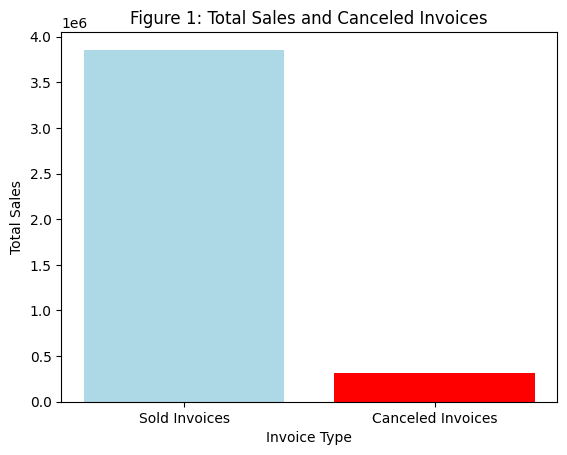

In [31]:
plt.bar(['Sold Invoices', 'Canceled Invoices'], [regular_sum, canceled_sum*-1], color=['lightblue', 'red'])
plt.xlabel('Invoice Type')
plt.ylabel('Total Sales')
plt.title('Figure 1: Total Sales and Canceled Invoices')
plt.show()

***Interpretaion***

The visualization shows a comparison bewteen the total sales of inocices that have been paid and the others that have been cancelled which were low. This insight will help you on the overall sales situation within your company. 

Text(0, 0.5, 'Number of Invoices')

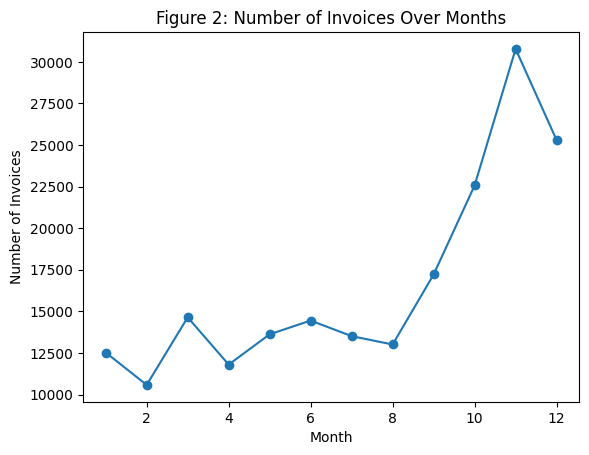

In [13]:
sample.groupby('InvoiceMonth')['Invoice'].count().plot(marker='o')
plt.title('Figure 2: Number of Invoices Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')

***Interpretaion***

The visualization shows number of invoces over the year for each month, from August until december your store have the hoghest sales. From January until July it's not very good.
This insight might help with deciding dates on launching your campain to target the highest customers posiible.

(-0.5, 399.5, 199.5, -0.5)

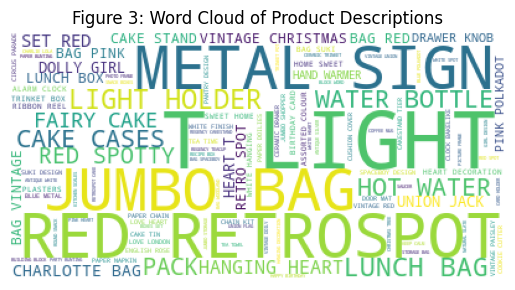

In [14]:
words = ' '.join(sample['Description'].dropna())
wordcloud = WordCloud(background_color='white').generate(words)
plt.imshow(wordcloud)
plt.title('Figure 3: Word Cloud of Product Descriptions')
plt.axis('off')

><b>Data Insights</b>

[Back](#intro)

#### Top 5 Total sales of Inovice:

1. Determine the total sales per invoice and identify the top 5 invoices.

In [15]:
print("The top 5 total Sales and their invovice:")
sample.groupby(sample['Invoice'])['total_price'].sum().nlargest(5)

The top 5 total Sales and their invovice:


Invoice
556444    38970.00
530715    15818.40
537632    13541.33
574941    11318.40
572209     9855.00
Name: total_price, dtype: float64

#### Top 5 Customers with Total sales:

2. Compute the total sales per customer and list the top 5 customers.

In [16]:
print("The top 5 buyers by Id:")
sample.groupby(sample['Customer ID'])['total_price'].sum().nlargest(5)

The top 5 buyers by Id:


Customer ID
18102.0    103610.73
14646.0     94118.39
17450.0     53062.80
14156.0     48606.45
14911.0     46425.48
Name: total_price, dtype: float64

#### Top 5 Selling Items:

3. Identify the top 5 selling items during this period.

In [17]:
def print_top_items(sample, top5):
    """
    Get top5 series and print the descriptions for each stockItem
    Args:
        sample (pd.Dataframe): sample of the dataset
        top5 (pd.Series): top 5 indexed by the Stockcode
    Returns:
        Nothing but displays teh outputs
    """
    print("The top selling items:")
    for stockcode in top5.index:
        print("Stock Code: ", stockcode)
        descriptions = sample[sample['StockCode'] == stockcode]['Description'].unique() #SOme items have multiple descriptions
        print("     Descriptions:", descriptions)

In [18]:
top5 = sample.groupby('StockCode')['total_price'].sum().nlargest(5)
print_top_items(sample, top5)

The top selling items:
Stock Code:  DOT
     Descriptions: ['DOTCOM POSTAGE']
Stock Code:  22423
     Descriptions: ['REGENCY CAKESTAND 3 TIER' 'faulty' 'damages']
Stock Code:  85123A
     Descriptions: ['WHITE HANGING HEART T-LIGHT HOLDER' 'CREAM HANGING HEART T-LIGHT HOLDER']
Stock Code:  22502
     Descriptions: ['PICNIC BASKET WICKER SMALL' 'reverse 21/5/10 adjustment' nan
 'PICNIC BASKET WICKER 60 PIECES']
Stock Code:  85099B
     Descriptions: ['JUMBO BAG RED RETROSPOT' 'JUMBO BAG RED WHITE SPOTTY '
 'RED RETROSPOT JUMBO BAG ' 'missing']


#### Most 20 Frequent Items Pairs:

4. Determine the most frequently purchased item pairs by customers and display the top 20 pairs.

> To approach this first lets group by customer ID and the INovice to get each innovice that is purchused by that same customer. Then that inovice it is made as lists of items (in that inovice). Finally since (Pairs it required) then the only_pairs function gets the shopped lists that has only two items.

In [19]:
def only_pairs(row):
    """
    Make the row into a list and keeps the pairs
    Args:
        row: (np.array): the row in the df
    Rturns:
        list of row and None if len is larger than 2
    """
    if len(list(row)) == 2:
        return list(row)
    else:
        return None

In [20]:
def print_top_20(sample, top20):
    """
    Get top10 series and print the descriptions for each
    Args:
        sample (pd.Dataframe): sample of the dataset
        top5 (pd.Series): top 20 indexed by the Stockcode
    Returns:
        Nothing but displays the outputs
    """
    print("The most frequently purchased item pairs are:")
    i = 0
    for stockcode in top20.index:
        print("Pairs # : ", i)
        print("Stock Codes: ", stockcode)
        for code in stockcode:
            descriptions = sample[sample['StockCode'] == code]['Description'].unique() #SOme items have multiple descriptions
            print("     Descriptions:", descriptions)
        print("\n")
        i = i+1

- Get the transactions that are on pairs (customer purchsed two items)

In [21]:
pairs_transactions = pd.DataFrame(sample.groupby(['Customer ID', 'Invoice'])['StockCode'].apply(only_pairs).dropna())
pairs_transactions.head()

StockCode
Customer ID Invoice                
12346.0     513774   [20685, 22689]
12347.0     556201   [22375, 23146]
            562032   [23297, 23146]
12348.0     539318   [22952, 21211]
12352.0     535838   [21181, 21756]

- count values (occurences of that pair) and then get the top 20 using head

In [22]:
top20 = pairs_transactions['StockCode'].value_counts().head(20)
top20.head()

StockCode
[22698, 22423]    3
[20727, 20725]    3
[21977, 21212]    3
[22625, 22624]    3
[21175, 21181]    3
Name: count, dtype: int64

- Print the top 20 pairs with their descriptions:

In [23]:
print_top_20(sample,top20)

The most frequently purchased item pairs are:
Pairs # :  0
Stock Codes:  ['22698', '22423']
     Descriptions: ['PINK REGENCY TEACUP AND SAUCER' nan 'TEACUP AND SAUCER REGENCY PINK']
     Descriptions: ['REGENCY CAKESTAND 3 TIER' 'faulty' 'damages']


Pairs # :  1
Stock Codes:  ['20727', '20725']
     Descriptions: ['LUNCH BAG  BLACK SKULL.']
     Descriptions: ['LUNCH BAG RED RETROSPOT' 'LUNCH BAG RED SPOTTY']


Pairs # :  2
Stock Codes:  ['21977', '21212']
     Descriptions: ['PACK OF 60 PINK PAISLEY CAKE CASES']
     Descriptions: ['PACK OF 72 RETRO SPOT CAKE CASES' 'PACK OF 72 RETROSPOT CAKE CASES']


Pairs # :  3
Stock Codes:  ['22625', '22624']
     Descriptions: ['RED KITCHEN SCALES']
     Descriptions: ['IVORY KITCHEN SCALES']


Pairs # :  4
Stock Codes:  ['21175', '21181']
     Descriptions: ['GIN + TONIC DIET METAL SIGN' 'GIN AND TONIC DIET METAL SIGN']
     Descriptions: ['PLEASE ONE PERSON METAL SIGN' nan 'PLEASE ONE PERSON  METAL SIGN']


Pairs # :  5
Stock Codes:  ['22041

- For your convience, the top 20 pairs are extracted into a csv file

In [24]:
pd.DataFrame(top20.index.to_flat_index()).to_csv('top_20_pairs.csv', header='StockCode')

#### Items for the promotion plan:

5. The retail store aims to introduce a new promotion targeting items with low sales volume. 
This promotion entails offering a discounted price for a pair of two different items, 
Customers who purchase these two items together will qualify for the special pricing. 

- One item being among the top 10 best sellers 
- The other from the bottom 10 sellers. 
- Your task is to recommend 10 pairs of items to kickstart this campaign.

> The plan is to get the top 10 sellers items, then get the top 10 bottm and pair them. (the pairing will be with review)

In [25]:
top10 = sample.groupby('StockCode')['total_price'].sum().nlargest(10)
print_top_items(sample, top10)

The top selling items:
Stock Code:  DOT
     Descriptions: ['DOTCOM POSTAGE']
Stock Code:  22423
     Descriptions: ['REGENCY CAKESTAND 3 TIER' 'faulty' 'damages']
Stock Code:  85123A
     Descriptions: ['WHITE HANGING HEART T-LIGHT HOLDER' 'CREAM HANGING HEART T-LIGHT HOLDER']
Stock Code:  22502
     Descriptions: ['PICNIC BASKET WICKER SMALL' 'reverse 21/5/10 adjustment' nan
 'PICNIC BASKET WICKER 60 PIECES']
Stock Code:  85099B
     Descriptions: ['JUMBO BAG RED RETROSPOT' 'JUMBO BAG RED WHITE SPOTTY '
 'RED RETROSPOT JUMBO BAG ' 'missing']
Stock Code:  47566
     Descriptions: ['PARTY BUNTING' nan]
Stock Code:  84347
     Descriptions: ['ROTATING SILVER ANGELS T-LIGHT HLDR' nan]
Stock Code:  84879
     Descriptions: ['ASSORTED COLOUR BIRD ORNAMENT']
Stock Code:  22086
     Descriptions: ["PAPER CHAIN KIT 50'S CHRISTMAS "]
Stock Code:  22197
     Descriptions: ['POPCORN HOLDER' 'SMALL POPCORN HOLDER' 'POPCORN HOLDER , SMALL ']


In [26]:
topBottom10 = sample.groupby('StockCode')['total_price'].sum().nsmallest(20)
print_top_items(sample, topBottom10)

The top selling items:
Stock Code:  23166
     Descriptions: ['MEDIUM CERAMIC TOP STORAGE JAR']
Stock Code:  B
     Descriptions: ['Adjust bad debt']
Stock Code:  AMAZONFEE
     Descriptions: ['AMAZON FEE']
Stock Code:  M
     Descriptions: ['Manual']
Stock Code:  BANK CHARGES
     Descriptions: ['Bank Charges' ' Bank Charges']
Stock Code:  D
     Descriptions: ['Discount']
Stock Code:  CRUK
     Descriptions: ['CRUK Commission']
Stock Code:  S
     Descriptions: ['SAMPLES']
Stock Code:  21096
     Descriptions: ['SET/6 FRUIT SALAD  PAPER PLATES']
Stock Code:  85160A
     Descriptions: ['WHITE BIRD GARDEN DESIGN MUG']
Stock Code:  21088
     Descriptions: ['SET/6 FRUIT SALAD PAPER CUPS']
Stock Code:  20840
     Descriptions: ['FRENCH FLORAL CUSHION COVER ']
Stock Code:  22102
     Descriptions: ['MIRROR MOSAIC T-LIGHT HOLDER ']
Stock Code:  20893
     Descriptions: ['HANGING BAUBLE T-LIGHT HOLDER SMALL' 'damages']
Stock Code:  79323G
     Descriptions: ['GOLD  CHERRY LIGHTS' nan]
Stock

> On printing the least sell items the follwing wil not be included as they are not items but appears for inventory reasons they have been included.

Their Stock Codes are:  
- B, AMAZONFEE, M, BANK CHARGES, D, CRUK, S
- Adjust bad debt, AMAZON FEE, Manual, Bank Charges, Bank Charges, Discount, CRUK Commission, SAMPLES.

<hr>

In [27]:
topBottom10set = set(topBottom10.index) - set(['B', 'AMAZONFEE', 'M', 'BANK CHARGES', 'D', 'CRUK', 'S'])
topBottom10List = list(topBottom10set)[:10]
topBottom10List

['79323B',
 '85109',
 '21096',
 '22102',
 '85160A',
 '23166',
 '20893',
 '47351B',
 '10138',
 '20840']

In [28]:
top10List = list(top10.index)
top10List

['DOT',
 '22423',
 '85123A',
 '22502',
 '85099B',
 '47566',
 '84347',
 '84879',
 '22086',
 '22197']

> now we have top 10 list and top bottom list let's pair them:

Well given the non-experience in pairing gifts for people that might get them together, the pairs are chosen randomly.

In [29]:
np.random.seed(1190652)
np.random.shuffle(top10List)
np.random.shuffle(topBottom10List)

promotion_pairs = pd.DataFrame((zip(top10List, topBottom10List)))

print("The Promotion pairs:")
promotion_pairs

The Promotion pairs:


,0,1
0,22423,85160A
1,22502,22102
2,85099B,47351B
3,DOT,79323B
4,47566,85109
5,85123A,23166
6,84347,21096
7,22197,10138
8,84879,20893
9,22086,20840


- For your conveince the pairs are extracted into csv file

In [30]:
promotion_pairs.to_csv('promotion_pairs.csv')

#### <b>Recommendations</b>
[Back](#intro)

In conclusion, we shall recmmoend you to launch the promotion campaign starting from mid of octobur, since you seem to have a high number of inovices between [September - Decemer] you will be more likely to sell those with higher numbers of cutomers. We shall also recommend using the peack sales hours and around to promote which is at at 15:28:00 o'clock.

It is worth mentioning that the percentages of canceling an innovice is (Canceled/Total inovices): 0.10263541982210228 which is relativly great. You have a total sum of -313,185.53 of canceld inovices in the time given, this is worth further investigation. 

You also have high non-registered customer, we recommned starting a campain since almost 23 percetage of the buyers are not registered. 

More details for your promotions campain based on your requiremnts:

**The Top 5 invoices based on their Total sales** are found to be very high such:

Table 9: Top 5 invoices

|Invoice|total price|
|-----|---|
|556444|    38,970.00|
|530715    |15,818.40|
|537632 |   13,541.33|
|574941  |  11,318.40|
|572209   |  9,855.00|

**Top 5 customers based on their Total buying**

Table 10: Top 5 customers

|Customer ID| total price|
|---|--|
|18102.0 |   103610.73|
|14646.0  |   94118.39|
|17450.0   |  53062.80|
|14156.0    | 48606.45|
|14911.0     |46425.48|

**Top 5 Selling Items during that Period**

1. DOTCOM POSTAGE
2. REGENCY CAKESTAND 3 TIER
3. WHITE HANGING HEART T-LIGHT HOLDER
4. PICNIC BASKET WICKER SMALL
5. 'JUMBO BAG RED RETROSPOT

**Top 20 Pairs, Most Frequently Purchased Item Pairs by Customers**

1. pink regency teacup and saucer and regency cakestand 3 tier
2. lunch bag black skull. and lunch bag red retrospot
3. pack of 60 pink paisley cake cases and pack of 72 retro spot cake cases
4. red kitchen scales and ivory kitchen scales
5. gin + tonic diet metal sign and please one person metal sign
6. record frame 7" single size and black record cover frame
7. white hanging heart t-light holder and wood black board ant white finish
8. postage and set/6 red spotty paper cups
9. coffee mug apples design and coffee mug cat + bird design
10. red retrospot cup and pink spotty cup
11. white hanging heart t-light holder and retro spot tea set ceramic 11 pc
12. kitchen metal sign and lovebird hanging decoration white
13. doormat spotty home sweet home and door mat union flag
14. pink blue felt craft trinket box and vintage snap cards
15. feltcraft cushion rabbit and feltcraft cushion owl
16. wooden frame antique white and knitted union flag hot water bottle
17. pink cream felt craft trinket box and feltcraft 6 flower friends
18. SINGLE HEART ZINC T-LIGHT HOLDER and HANGING HEART ZINC T-LIGHT HOLDER
19. green regency teacup and saucer and pink regency teacup and saucer
20. childrens apron spaceboy design and lunch bag suki design

**Recommendations for a New Promotion Targeting Items with Low Sales Volume**


In [32]:
print("The Promotion pairs:")
promotion_pairs

The Promotion pairs:


,0,1
0,22423,85160A
1,22502,22102
2,85099B,47351B
3,DOT,79323B
4,47566,85109
5,85123A,23166
6,84347,21096
7,22197,10138
8,84879,20893
9,22086,20840


You can also refer to the csv results files

<hr>

#### <b>Refrences</b>
[Back](#intro)

- [1] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html
- [2] https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook
- [3] https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
- [4] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.to_flat_index.html
<hr>